In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import requests
import json
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import MO
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
# sometimes this API is down 
URL = 'https://covidtracking.com/api/states/daily'
r = requests.get(URL)
sd = pd.read_json(json.dumps(r.json()))

# convert floats to dates
sd['date'] = pd.to_datetime(sd['date'], format='%Y%m%d')
# replace zeros with nulls for cleaner plots
data_threshold_cases = 1
sd.loc[sd.loc[:, 'positive'] < data_threshold_cases, 'positive'] = np.nan
state_data = sd
state_data.head()


,date,state,positive,negative,pending,hospitalized,death,total,dateChecked
0,2020-03-23,AK,22.0,946.0,NaN,0.0,NaN,968,2020-03-23T20:00:00Z
1,2020-03-23,AL,167.0,1665.0,NaN,NaN,0.0,1832,2020-03-23T20:00:00Z
2,2020-03-23,AR,174.0,906.0,0.0,13.0,0.0,1080,2020-03-23T20:00:00Z
3,2020-03-23,AS,NaN,NaN,NaN,NaN,0.0,0,2020-03-23T20:00:00Z
4,2020-03-23,AZ,265.0,309.0,6.0,NaN,2.0,580,2020-03-23T20:00:00Z


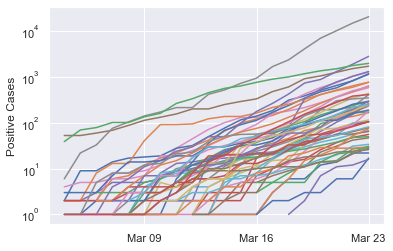

In [3]:
# set start of week date ticks on plot
def format_plots():
    fig, ax = plt.subplots()
    loc = mdates.WeekdayLocator(byweekday=MO)
    ax.xaxis.set_major_locator(loc)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
    ax.set_yscale('log')
    ax.set_ylabel('Positive Cases')
    return fig, ax

# show all the states overlaid
fig, ax = format_plots()
for group in state_data.groupby('state'):
    ax.plot('date', 'positive', data=group[1])
plt.show()

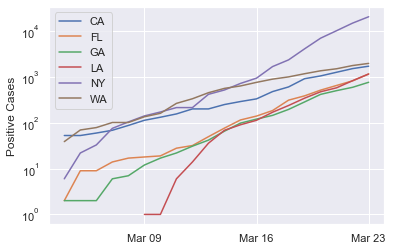

In [4]:
# filter individual states from data and plot
fig, ax = format_plots()
for state, data in state_data.groupby('state'):
    if state in ['CA', 'WA', 'NY', 'GA', 'LA', 'FL']:
        ax.plot('date', 'positive', data=data, label=state)

ax.legend()
plt.show() 